<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 2</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Gianni Beninati;201773508-2;7313</h3>
    <h3 align="center">Abril 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 3 de Mayo.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**


---
**Esto es solo una sugerencia y no tendrá ningún impacto en su nota**

## Tip para Gráficos (Python)

Puede hacer sus gráficos un poco más estilosos utilizando la libreria seaborn

```python
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline #con esto no es necesario hacer plt.show()
```

El uso es igual que un gráfico de matplotlib, solo que ```sns.set()``` hace que se cargue la visualización de seaborn encima. [Informacion sobre seaborn.set()](https://seaborn.pydata.org/generated/seaborn.set.html)

## Tip para Gráficos (R)

Puede hacer sus gráficos un poco más estilosos utilizando la libreria [ggplot2](https://www.statmethods.net/advgraphs/ggplot2.html)


## Interactive Widgets

Si usted está trabajando en python puede hacer una widget interactiva que varíe los parámetros de una función, como se puede ver en el siguiente fragmento de código (debe ejecutarlo).

In [44]:
from ipywidgets import interact 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline 

def plot_serie(x):
    values = np.arange(1,x,0.5)**2
    values2 = np.arange(1,x,0.5)**3
    print(values)
    print(values2)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.plot(values/values2)
        

interact(plot_serie,x=(2,20))

interactive(children=(IntSlider(value=11, description='x', max=20, min=2), Output()), _dom_classes=('widget-in…

<function __main__.plot_serie(x)>

---
## 1. Retención de Clientes

La fuga (*churn*, término en inglés) de clientes es algo que muchas empresas de hoy en día sufren, la fuga puede deberse a muchos factores, uno de estos podría ser alguna característica del servicio en sí que provee la empresa. En esta sección usted trabajará con un dataset de "Telco", una empresa de telecomunicaciones, donde verá varios datos relacionados al plan de los clientes, uno de estos campos siendo "*Churn*", si el cliente se fugó o no. 

El archivo a utilizar es "churn.csv" y para información extra puede referirse a [este enlace](https://www.kaggle.com/blastchar/telco-customer-churn)

>a) Haga un análisis exploratorio **a su criterio** del dataset y extraiga 3 conclusiones acerca del conjunto de datos

### Código Pregunta 1.a

In [45]:
import csv

#Se utiliza para evitar agregar el primer dato, pues este es la descripcion de cada columna y no es un dato como tal
flag = False
#Se crean listas para almacenar las columnas de interes
gender = []
tenure = []
internet_service = []
monthly_charge = []
churn = []
#Se guardan las columnas del archivo en las listas respectivas
with open('churn.csv') as csvfile:
    registros = csv.reader(csvfile, delimiter=',')
    for registro in registros:
        if flag:
            gender.append(registro[1])
            tenure.append(int(registro[5]))
            internet_service.append(registro[8])
            monthly_charge.append(float(registro[18]))
            churn.append(registro[20])
        flag = True

El 26.920871559633024 de la mujeres se fugaron ( 939 mujeres fugadas de 3488 mujeres totales)
El 26.160337552742618 de los hombres se fugaron ( 930 hombres fugados de 3555 hombres totales)


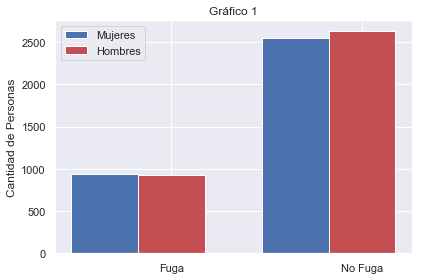

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#Se calcula la cantidad de mujeres y hombres que se fugaron para realizar un grafico de barras y obtener conclusiones al respoecto
i = 0
mujeres_fugadas = 0
mujeres_Nofugadas = 0
hombres_fugados = 0
hombres_Nofugados = 0
n = len(gender)
while i < n:
    if gender[i] == 'Female':
        if churn[i] == 'Yes':
            mujeres_fugadas += 1
        else:
            mujeres_Nofugadas += 1
    else:
        if churn[i] == 'Yes':
            hombres_fugados += 1
        else:
            hombres_Nofugados += 1 
    i+=1

total_mujeres = mujeres_fugadas + mujeres_Nofugadas
total_hombres = hombres_fugados + hombres_Nofugados


#Se crea el grafico de barras
Mujeres = (mujeres_fugadas,mujeres_Nofugadas)
Hombres = (hombres_fugados,hombres_Nofugados)

fig, ax = plt.subplots()
index = np.arange(2)
 
plt.bar(index, Mujeres,0.35,color='b',label='Mujeres')
 
plt.bar(index + 0.35, Hombres,0.35,color='r',label='Hombres')
 
plt.ylabel('Cantidad de Personas')
plt.title('Gráfico 1')
plt.xticks(index + 0.35, ('Fuga', 'No Fuga'))
plt.legend() 
plt.tight_layout()

print("El", (mujeres_fugadas/total_mujeres)*100,"de la mujeres se fugaron (",mujeres_fugadas, "mujeres fugadas de", total_mujeres,"mujeres totales)")
print("El", (hombres_fugados/total_hombres)*100,"de los hombres se fugaron (",hombres_fugados, "hombres fugados de", total_hombres,"hombres totales)")

El 44.52408256880734 de la mujeres prefieren fibra óptica ( 1553 mujeres con fibra óptica de 3488 mujeres totales)
El 43.40365682137834 de los hombres prefieren fibra óptica ( 1543 hombres con fibra óptica 3555 hombres totales)


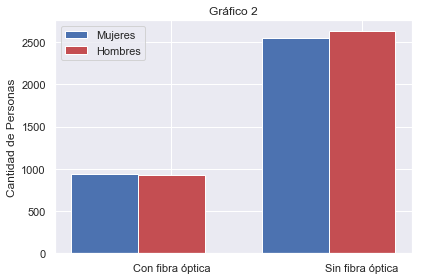

In [49]:
#Se calcula la cantidad de mujeres y hombres que se con fibra para realizar un grafico de barras y obtener conclusiones al respoecto
i = 0
n = len(gender)
#Variable que guardara la cantidad de mujeres con fibra
mujeres_fibra = 0
#Variable que guardara la cantidad de mujeres sin fibra
mujeres_Sinfibra = 0
#Variable que guardara la cantidad de hombres con fibra
hombres_fibra = 0
#Variable que guardara la cantidad de hombres sin fibra
hombres_Sinfibra = 0
#Variable que guardara la cantidad total de personas con fibra
fibra = 0

while i < n:
    if gender[i] == 'Female':
        if internet_service[i] == 'Fiber optic':
            mujeres_fibra += 1
            fibra += 1
        else:
            mujeres_Sinfibra += 1
    else:
        if internet_service[i] == 'Fiber optic':
            hombres_fibra += 1
            fibra += 1
        else:
            hombres_Sinfibra += 1 
    i+=1
#Se realiza el grafico de barras de manera similar al caso anterior
Mujeres_Fibra = (mujeres_fibra,mujeres_Sinfibra)
Hombres_Fibra = (hombres_fibra,hombres_Sinfibra)

fig, ax = plt.subplots()
index = np.arange(2)
 
plt.bar(index, Mujeres,0.35,color='b',label='Mujeres')
 
plt.bar(index + 0.35, Hombres,0.35,color='r',label='Hombres')
 
plt.ylabel('Cantidad de Personas')
plt.title('Gráfico 2')
plt.xticks(index + 0.35, ('Con fibra óptica', 'Sin fibra óptica'))
plt.legend() 
plt.tight_layout()

print("El", (mujeres_fibra/total_mujeres)*100,"de la mujeres prefieren fibra óptica (",mujeres_fibra, "mujeres con fibra óptica de", total_mujeres,"mujeres totales)")
print("El", (hombres_fibra/total_hombres)*100,"de los hombres prefieren fibra óptica (",hombres_fibra, "hombres con fibra óptica", total_hombres,"hombres totales)")

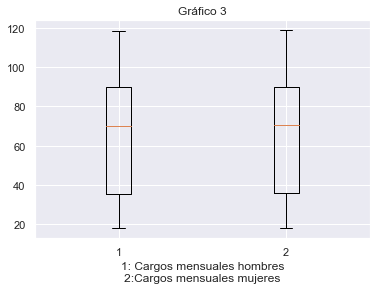

In [50]:
i = 0
#Listas que guardan los cargos de los hombres y mujeres respectivamente
cargo_hombres = []
cargo_mujeres = []

while i < n:
    if gender[i] == 'Female':
        cargo_mujeres.append(monthly_charge[i])
    else:
        cargo_hombres.append(monthly_charge[i])
    i += 1

#Se crea un Boxplot acerca del cargo mensual de los hombres y de las mujeres
plt.boxplot([cargo_hombres,cargo_mujeres])
plt.title('Gráfico 3')
plt.xlabel('1: Cargos mensuales hombres\n2:Cargos mensuales mujeres')
plt.show()

### Respuesta pregunta 1.a
El primer análisis de los datos a realizar es si el sexo del cliente influye en la existencia de fuga o no. Con el fin de lograr esto se creó el “Gráfico 1”, en el cual se aprecian la cantidad de hombres y mujeres que se fugaron, así como también se puede observar la cantidad de hombres y mujeres que no lo hicieron. Al analizar el gráfico es posible notar que no existe prácticamente ninguna diferencia entre los hombres y mujeres fugados, así como también en los no fugados. Por otro lado, también existe similitud en la cantidad total de hombres y de mujeres (3555 hombres y 3488 mujeres), en donde, un 26% aproximadamente en cada caso se fuga, teniendo 930 hombres fugados y 939 mujeres fugadas, en ambos casos, cantidades muy similares, por lo que se puede concluir que el sexo del cliente no influye en la fuga del cliente.

En cuanto al segundo análisis, se intentará deducir si existe alguna preferencia de fibra óptica dependiendo del sexo del cliente. Al igual que en el primer caso, también se realizó un gráfico de barras (Gráfico 2), en el que tampoco existe prácticamente diferencias entre ambos sexos. En este caso un 43% de los hombres aproximadamente prefieren fibra óptica y un 45% de las mujeres prefieren también fibra óptica, obteniendo un resultado de 1543 hombres y 1553 mujeres, cantidades nuevamente similares, lo que se aprecia también en las barras del gráfico. Por lo tanto, se puede concluir que el sexo tampoco influye en la preferencia de fibra óptica, y en general los clientes tienden a preferir otros servicios en vez del de fibra óptica.

Finalmente, en cuanto al tercer análisis, se buscó comparar los cargos mensuales entre los hombres y las mujeres.  Para realizar esto, se creó un diagrama de cajón con bigote para cada sexo con respecto a sus cargos mensuales que se puede apreciar en el “Gráfico 3”. Curiosamente ambos diagramas son prácticamente idénticos en donde, el 50% de los clientes (hombre o mujer) pagan un cargo mensual entre 38 y 90 dólares aproximadamente y un 50% de los clientes, pagan menos de 70 dólares por mes aproximadamente. También es posible notar un leve sesgo negativo, por lo que se tiende a tener gastos mensuales mayores a 60 dólares y no existen “outliers” en ninguno de los 2 casos.

> b.1) Determine la probabilidad de que: <ul>
    <li>Un cliente sea mujer dado que tiene fibra óptica </li>
    <li>Un cliente sea hombre dado que tiene fibra óptica</li>
    <li>Un cliente sea mujer dado que no tiene fibra óptica</li>
    <li>Un cliente sea hombre dado que no tiene fibra óptica</li>
    </ul>
    Además indique cuál/es de estos pares deben sumar 1 (Si es que algún par debe sumar esta cantidad). Justifique su respuesta.
    

### Código Pregunta 1.b

In [51]:
#Se calculan las probabilidades condicionadas utilizando la formula vista em clases
prob_mujer_fibra = (mujeres_fibra/n)/(fibra/n)
prob_mujer_Sinfibra = (mujeres_Sinfibra/n)/(1 - fibra/n)
prob_hombre_fibra = (hombres_fibra/n)/(fibra/n)
prob_hombre_Sinfibra = (hombres_Sinfibra/n)/(1 - fibra/n)

print('La probabilidad de que un cliente sea mujer dado que tiene fibra óptica es:',prob_mujer_fibra)
print('La probabilidad de que un cliente sea hombre dado que tiene fibra óptica es:', prob_hombre_fibra)
print('La probabilidad de que un cliente sea mujer dado que no tiene fibra óptica es:', prob_mujer_Sinfibra)
print('La probabilidad de que un cliente sea hombre dado que no tiene fibra óptica es:', prob_hombre_Sinfibra)

La probabilidad de que un cliente sea mujer dado que tiene fibra óptica es: 0.5016149870801033
La probabilidad de que un cliente sea hombre dado que tiene fibra óptica es: 0.4983850129198967
La probabilidad de que un cliente sea mujer dado que no tiene fibra óptica es: 0.49024575627058525
La probabilidad de que un cliente sea hombre dado que no tiene fibra óptica es: 0.5097542437294148


### Respuesta pregunta 1.b1
Aquellas probabilidades que deben sumar 1 corresponden a la probabilidad de que un cliente sea mujer dado que tiene fibra con la probabilidad de que un cliente sea hombre dado que tiene fibra óptica, por un lado, y la probabilidad de que un cliente sea mujer dado que no tiene fibra óptica con la probabilidad de que un cliente sea hombre dado que no tiene fibra óptica, por el otro lado.

Para calcularlas se utilizaron las siguientes fórmulas de probabilidad condicional en el orden respectivo de la pregunta:

<img src="img/mujer_fibra.png">
<img src="img/hombreF.png">
<img src="img/mujer_Sinfibra.png">
<img src="img/hombre_Sinfibra.png">

En donde:

<h2 align="center">M: El cliente es mujer</h2>
<h2 align="center">F: El cliente tiene fibra óptica</h2>

>b.2) ¿Es posible concluir que si un cliente es hombre tiene más probabilidad de tener fibra óptica? ¿Y si es mujer? ¿Por qué?

### Respuesta pregunta 1.b2
No es posible concluir que si un cliente es hombre tiene más probabilidad de que tenga fibra, ni que si un cliente es mujer tiene mas probabilidad de tener fibra, pues ambas probabilidades son prácticamente similares, al igual que la cantidad de hombres y mujeres que tienen y no tienen fibra, por lo que no hay una diferencia significativa entre ambos.

>c) Utilizando criterios de probabilidad condicional ¿Hay algún servicio de internet más propenso a la fuga?

### Código Pregunta 1.c

In [52]:
i = 0
n = len(gender)
#Variable que guardara la cantidad de personas que se fugaron y tienen fibra
fugados_fibra = 0
#Variable que guardara la cantidad de personas que se fugaron y tienen DSL
fugados_DSL = 0
#Variable que guardara la cantidad de personas que se fugaron y no tienen ningun servicio
fugados_no = 0
#Variable que guardara la cantidad de personas que se fugaron
fugados = churn.count('Yes')
#Variable que guardara la cantidad de personas que tienen fibra
fibra = internet_service.count('Fiber optic')
#Variable que guardara la cantidad de personas tienen DSL
DSL = internet_service.count('DSL')
#Variable que guardara la cantidad de personas que no tienen ningun servicio de internet
Sin_servicio = internet_service.count('No')

while i < n:
    if churn[i] == 'Yes':
        if internet_service[i] == 'DSL':
            fugados_DSL += 1
        elif internet_service[i] == 'No':
            fugados_no += 1
        else:
            fugados_fibra += 1
    i+=1

#Se calculan las probabilidades de que haya fuga dado que se tiene el servicio "x"
prob_fuga_fibra = (fugados_fibra/n)/(fibra/n)
prob_fuga_DSL = (fugados_DSL/n)/(DSL/n)
prob_fuga_no = (fugados_no/n)/(Sin_servicio/n)

print('La probabilidad de que haya fuga dado que un cliente tiene fibra óptica es:', prob_fuga_fibra)
print('La probabilidad de que haya fuga dado que un cliente tiene DSL es:', prob_fuga_DSL)
print('La probabilidad de que haya fuga dado que un cliente no tiene ningún servicio de internet es:', prob_fuga_no)

La probabilidad de que haya fuga dado que un cliente tiene fibra óptica es: 0.4189276485788114
La probabilidad de que haya fuga dado que un cliente tiene DSL es: 0.18959107806691447
La probabilidad de que haya fuga dado que un cliente no tiene ningún servicio de internet es: 0.07404980340760157


### Respuesta pregunta 1.c
Para obtener los resultados, se utilizaron nuevamente las fórmulas de probabilidad condicional, pero en este caso, las variables utilizadas fueron: "El cliente se fugó", "El cliente tiene fibra óptica", "El cliente tiene DSL" y "El cliente no tiene ningún servicio de internet".

Si existe un servicio de internet más propenso a la fuga, y este corresponde al servicio de fibra óptica, pues la probabilidad de que haya fuga dado que un cliente utiliza ese servicio es de 0.419 aproximadamente, superando ampliamente a la probabilidad del resto de los servicios (probabilidad de 0.190 de fuga dado que tiene DSL y probabilidad de 0.074 de fuga dado que el cliente no tiene servicio de internet).

>d) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la fuga? y ¿es la fuga un buen predictor del cargo mensual de un cliente?

### Código Pregunta 1.d

In [53]:
i = 0
maximo = max(monthly_charge)


#Guardara las personas que pagan mensualmente entre 0 y 30 dolares y se fugaron
fuga_costo30 = 0
#Guardara las personas que pagan mensualmente entre 0 y 30 dolares
costo30 = 0
#Guardara las personas que pagan mensualmente entre 30 y 60 dolares y se fugaron
fuga_costo60 = 0
#Guardara las personas que pagan mensualmente entre 30 y 60 dolares
costo60 = 0
#Guardara las personas que pagan mensualmente entre 60 y 90 dolares y se fugaron
fuga_costo90 = 0
#Guardara las personas que pagan mensualmente entre 60 y 90 dolares
costo90 = 0
#Guardara las personas que pagan mensualmente mas de 90 dolares
fuga_costo120 = 0
#Guardara las personas que pagan mensualmente mas de 90 dolares
costo120 = 0


while i < n:
    costo = monthly_charge[i]
    if costo <= 30:
        costo30 += 1
        if churn[i] == 'Yes':
            fuga_costo30 += 1
    elif costo>30 and costo<=60:
        costo60 += 1
        if churn[i] == 'Yes':
            fuga_costo60 += 1
    elif costo>60 and costo<=90:
        costo90 += 1
        if churn[i] == 'Yes':
            fuga_costo90 += 1
    elif costo>90 and costo<=maximo:
        costo120 += 1
        if churn[i] == 'Yes':
            fuga_costo120 += 1
    i+=1

#Probabilidades de que un cliente pague "x" dolares dado que se fugó    
prob_costo30 = (fuga_costo30/n)/(fugados/n)
prob_costo60 = (fuga_costo60/n)/(fugados/n)
prob_costo90 = (fuga_costo90/n)/(fugados/n)
prob_costo120 = (fuga_costo120/n)/(fugados/n)

#Probabilidades de que haya fuga dado que se pagan "x" dolares
prob_fuga30 = (fuga_costo30/n)/(costo30/n)
prob_fuga60 = (fuga_costo60/n)/(costo60/n)
prob_fuga90 = (fuga_costo90/n)/(costo90/n)
prob_fuga120 = (fuga_costo120/n)/(costo120/n)


print('La probabilidad de que un cliente pague mensualmente menos de 30 dólares dado que se fugó  es:', prob_costo30)
print('La probabilidad de que un cliente pague mensualmente entre 30 y 60 dólares dado que se fugó  es:', prob_costo60)
print('La probabilidad de que un cliente pague mensualmente entre 60 y 90 dólares dado que se fugó  es:', prob_costo90)
print('La probabilidad de que un cliente pague mensualmente mas de 90 dólares dado que se fugó  es:', prob_costo120)
print('\n')
print('La probabilidad de que haya fuga dado que un cliente paga menos de 30 dólares es:', prob_fuga30)
print('La probabilidad de que haya fuga dado que un cliente paga mas de 30 dólares y menos de 60 es:', prob_fuga60)
print('La probabilidad de que haya fuga dado que un cliente paga mas de 60 dólares y menos de 90 es:', prob_fuga90)
print('La probabilidad de que haya fuga dado que un cliente paga mas de 90 dólares es:', prob_fuga120)


La probabilidad de que un cliente pague mensualmente menos de 30 dólares dado que se fugó  es: 0.08667736757624397
La probabilidad de que un cliente pague mensualmente entre 30 y 60 dólares dado que se fugó  es: 0.17549491706795076
La probabilidad de que un cliente pague mensualmente entre 60 y 90 dólares dado que se fugó  es: 0.43285179240235416
La probabilidad de que un cliente pague mensualmente mas de 90 dólares dado que se fugó  es: 0.30497592295345105


La probabilidad de que haya fuga dado que un cliente paga menos de 30 dólares es: 0.09800362976406533
La probabilidad de que haya fuga dado que un cliente paga mas de 30 dólares y menos de 60 es: 0.2592885375494071
La probabilidad de que haya fuga dado que un cliente paga mas de 60 dólares y menos de 90 es: 0.3390611902766136
La probabilidad de que haya fuga dado que un cliente paga mas de 90 dólares es: 0.32777458309373203


### Respuesta pregunta 1.d
El cargo mensual si es un buen predictor de la fuga, pues mientras más dinero pagan los clientes las probabilidades de que haya fuga tienden a aumentar o por lo menos mantenerse casi iguales. Los clientes que pagan menos de 30 dólares tienen una baja probabilidad de fugarse de aproximadamente 0.1, mientras que los que pagan entre 30 y 60, aumenta a aproximadamente 0.26, aumentando aún más entre aquellos clientes que pagan entre 60 y 90 dólares a 0.34. Finalmente, aquellos que pagan más de 90 dólares, mantienen prácticamente la misma probabilidad con 0.33. En otras palabras, las personas que pagan más de 60 dólares mensuales tienen una probabilidad significativa de fugarse de 0.67 aproximadamente.

En cuanto a la fuga como predictor del cargo mensual, los resultados obtenidos son congruentes con la conclusión anterior, si hay fuga, es muy probable que el cliente estuviera pagando más de 60 dólares mensuales con una probabilidad de aproximadamente 0.74, por lo que sí es un buen predictor del cargo mensual si se consideran solo los casos en que un cliente paga menos o más de 60 dólares mensuales. Si se divide en más casos, resulta más difícil analizar el comportamiento de los cargos mensuales, pues las probabilidades en algunos casos aumentan cuando el cargo disminuye y disminuyen cuando el cargo aumenta, por ejemplo, la probabilidad de que un cliente pague entre 60 y 90 es de aproximadamente 0.44, pero la probabilidad de que un cliente pague más de 90 disminuye a 0.30, por lo que no es tan buen predictor. 

>e) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la estadia de un cliente? y ¿es la estadia del cliente un buen predictor del cargo mensual de este?

*Estadia*: tenure

### Código Pregunta 1.e

In [54]:
i = 0
#Guardara la cantidad de personas que se encuentran utilizando los servicios menos de 36 meses y pagando menos de 60 dolares
estadia36_costo60 = 0
#Guardara las pesonas que pagan menos de 60 dolares mensuales
costos60 = 0
#Guardara la cantidad de personas que se encuentran utilizando los servicios menos de 36 meses
estadia36 = 0
#Guardara la cantidad de personas que se encuentran utilizando los servicios menos de 36 meses y pagando mas de 60 dolares
estadia36_costo120 = 0
#Guardara las pesonas que pagan mas de 60 dolares mensuales
costos120 = 0
#Guardara la cantidad de personas que se encuentran utilizando los servicios mas de 36 meses y pagando menos de 60 dolares
estadia72_costo60 = 0
#Guardara la cantidad de personas que se encuentran utilizando los servicios mas de 36 meses
estadia72 = 0
#Guardara la cantidad de personas que se encuentran utilizando los servicios mas de 36 meses y pagando mas de 120 dolares
estadia72_costo120 = 0

while i < n:
    if tenure[i] <= 36:
        estadia36 += 1
        if monthly_charge[i] <= 60:
            costos60 += 1
            estadia36_costo60 += 1
        else:
            costos120 += 1
            estadia36_costo120 += 1
    else:
        estadia72 += 1
        if monthly_charge[i] <= 60:
            costos60 += 1
            estadia72_costo60 += 1
        else:
            costos120 += 1
            estadia72_costo120 += 1
    i+=1

#Probabilidades de quedarse "x" meses dado que el cliente paga "y" dolares
prob_estadia36_costo60 = (estadia36_costo60/n)/(costos60/n)
prob_estadia72_costo60 = (estadia72_costo60/n)/(costos60/n)
prob_estadia36_costo120 = (estadia36_costo120/n)/(costos120/n)
prob_estadia72_costo120 = (estadia72_costo120/n)/(costos120/n)

#Probabilidades de pagar "x" dolares mensualmente dado que se utiliza el servicio "y" meses
prob_costo60_estadia36 = (estadia36_costo60/n)/(estadia36/n)
prob_costo120_estadia36 = (estadia36_costo120/n)/(estadia36/n)
prob_costo60_estadia72 = (estadia72_costo60/n)/(estadia72/n)
prob_costo120_estadia72 = (estadia72_costo120/n)/(estadia72/n)

print('La probabilidad de que un cliente haya utilizado el servicio menos de 36 meses dado que paga menos de 60 dólares es:', prob_estadia36_costo60)
print('La probabilidad de que un cliente haya utilizado el servicio mas de 36 meses dado que paga menos de 60 dólares es:', prob_estadia72_costo60)
print('La probabilidad de que un cliente haya utilizado el servicio menos de 36 meses dado que paga mas de 60 dólares es:', prob_estadia36_costo120)
print('La probabilidad de que un cliente haya utilizado el servicio mas de 36 meses dado que paga mas de 60 dólares es:', prob_estadia72_costo120)
print("\n")
print('La probabilidad de que un cliente pague menos de 60 dólares dado que se encuentra utilizando el servicio hace menos 36 meses es:',prob_costo60_estadia36)
print('La probabilidad de que un cliente pague mas de 60 dólares dado que se encuentra utilizando el servicio hace menos 36 meses es:',prob_costo120_estadia36)
print('La probabilidad de que un cliente pague menos de 60 dólares dado que se encuentra utilizando el servicio hace mas 36 meses es:',prob_costo60_estadia72)
print('La probabilidad de que un cliente pague mas de 60 dólares dado que se encuentra utilizando el servicio hace mas 36 meses es:',prob_costo120_estadia72)


La probabilidad de que un cliente haya utilizado el servicio menos de 36 meses dado que paga menos de 60 dólares es: 0.6624400274160385
La probabilidad de que un cliente haya utilizado el servicio mas de 36 meses dado que paga menos de 60 dólares es: 0.33755997258396164
La probabilidad de que un cliente haya utilizado el servicio menos de 36 meses dado que paga mas de 60 dólares es: 0.5112727272727272
La probabilidad de que un cliente haya utilizado el servicio mas de 36 meses dado que paga mas de 60 dólares es: 0.4887272727272727


La probabilidad de que un cliente pague menos de 60 dólares dado que se encuentra utilizando el servicio hace menos 36 meses es: 0.4782285997031173
La probabilidad de que un cliente pague mas de 60 dólares dado que se encuentra utilizando el servicio hace menos 36 meses es: 0.5217714002968827
La probabilidad de que un cliente pague menos de 60 dólares dado que se encuentra utilizando el servicio hace mas 36 meses es: 0.32822392535821393
La probabilidad de q

### Respuesta pregunta 1.e

El cargo mensual si es un buen predictor de la estadía de un cliente si este es menor a 60 dólares, pues existen diferencias significativas entre las probabilidades de aquellos clientes cuya estadía es menor o mayor a 36 meses, siendo más probable (0.66 de probabilidad) que un cliente utilice el servicio por menos de 36 meses y menos probable que utilice el servicio por mas de 36 meses dado que paga menos de 60 dólares (probabilidad de 0.34). Si el cargo mensual es mayor a 60 dólares, este no es un buen predictor de la estadía de un cliente pues las probabilidades obtenidas son muy cercanas: 0.51 de probabilidad de utilizar el servicio menos de 36 meses, y 0.49 de utilizarlo mas de 36 meses, en ambos casos, dado que se paga mas de 60 dólares. 

En cuanto al caso inverso, predecir el cargo mensual dado la estadía, no es un buen predictor, si la estadía es menor a 36 meses, pues al igual que el caso anterior, las probabilidades de pagar más o menos de 60 dólares dado que la estadía es menor de 36 meses, son muy similares (0.52 para menos de 60 dólares y 0.48 para más de 60 dólares). Si la estadía es mayor a 32 meses, este si es un buen predictor del cargo mensual, teniendo una probabilidad de 0.67 de que un cliente pague más de 60 dólares dado una estadía mayor a 36 meses, y una probabilidad de 0.33 de que un cliente pague menos de 60 dólares dado también una estadía mayor a 36 meses.

## 2. Máquina de Rube Goldberg

Una máquina de Rube Goldberg es un artefacto extremadamente complejo que realiza una tarea fácil. Usted, en su tiempo libre, decidió construir uno de estos artefactos que consta de 5 etapas:

<ol>
    <li>Lanza una bolita que rueda por un riel con una probabilidad de $\dfrac{2}{5}$ de caerse</li>
    <li>Después de rodar por el riel cae en una catapulta que la lanza en la dirección correcta el $60\%$ de las veces</li>
    <li>Impacta contra una tela que le frena el impulso y la hace caer sobre el interruptor de un ventilador, el $80\%$ de las veces es capaz de activar el ventilador</li>
    <li>Cuando el ventilador se activa empuja un barco de juguete en una fuente con agua hasta el otro extremo de esta para empujar otra bolita, el barco llega con suficiente impulso con una probabilidad de $\dfrac{6}{9}$</li>
    <li>Esta bolita rueda por otro riel y cae sobre el control remoto que enciende su televisor, en un $30\%$ de las veces logra encenderlo</li>
</ol>

>a) Usted quiere subir su máquina de Rube Goldberg a Youtube™, estime cuántas veces (en promedio) tendrá que poner en marcha su máquina hasta que resulte por primera vez en video. A su vez, haga un gráfico mostrando la probabilidad de no tener éxito en función del número de puestas en marcha de la máquina y comente.

### Nota: Si los códigos se corren nuevamente, pueden existir diferencias en los resultados colocados en las respuestas, pues muchos de estos dependen de la aleatoriedad.

### Código Pregunta 2.a

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [58]:
#Se define una función para cada etapa que entregará True o False dependiendo de si logra pasar esa etapa con respecto a las probabilidades del enunciado
def riel():
    evento = np.random.choice([False,True], p = [0.4,0.6])
    return evento

def catapulta():
    evento = np.random.choice([False,True], p = [0.4,0.6])
    return evento

def ventilador():
    evento = np.random.choice([False,True], p = [0.2,0.8])
    return evento

def barco():
    evento = np.random.choice([False,True], p = [(3.0/9.0),(6.0/9.0)])
    return evento

def control():
    evento = np.random.choice([False,True], p = [0.7,0.3])
    return evento

#Lista que guardará la cantidad de veces que se tuvo que correr la máquina hasta funcionar
intentos = []
#Se cuentan la cantidad de veces que se corre la máquina hasta funcionar, agregando el valor a la lista intentos y repitiendo este procedimiento 1000 veces para luego obtener un promedio de las veces que se debe correr la máquina
for i in range(1000):
    exito = False
    fracasos = 0
    #Mientras no se logren todas las etapas, se debe seguir intentando, contando cada intento.
    while not exito:
        if riel() and catapulta() and ventilador() and barco() and control():
            exito = True
            intentos.append(fracasos)
        else:
            fracasos +=1
print("Las veces que se debe correr la máquina para que resulte es de", sum(intentos)/len(intentos),'veces en promedio')

Las veces que se debe correr la máquina para que resulte es de 16.475 veces en promedio


Text(0.5, 1.0, 'Gráfico 1')

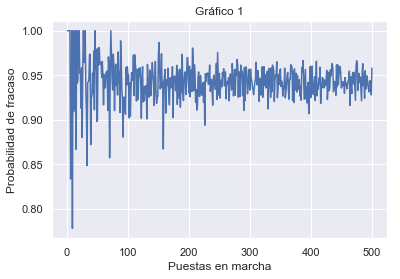

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline 

#Lista que guarda los valores del eje Y (Probabilidad de fracasar dado x intentos)
valores_Y = []
#Lista que guarda los valores del eje X (Cantidad de intentos)
valores_X = range(1,501)
for i in valores_X:
    #Se cuentan el numero de fracasos
    fracasos = 0
    j = 0
    while j < i:
        exitoso = np.random.choice([True,False], p=[0.0576,0.9424])
        if not exitoso:
            fracasos += 1
        j+=1
    #Se agrega la probabilidad de fracasar a la lista para las distintas cantidades de intentos, correspondiente al numero de fracasos dividido en la cantidad de intentos
    valores_Y.append(fracasos/i)
plt.plot(valores_X,valores_Y)
plt.xlabel('Puestas en marcha')
plt.ylabel('Probabilidad de fracaso')
plt.title('Gráfico 1')

### Respuesta pregunta 2.a
Las veces que se debe correr la máquina para que resulte es de 16 veces aproximadamente en promedio. Para obtener este valor se puso en marcha el experimento hasta que funcione y se logre la última etapa, guardando el número intentos. Esto se repitió 1000 veces, y se obtuvo un promedio de la cantidad de intentos, siendo este 16.98.

Si se analiza el gráfico obtenido (Gráfico 1), se puede notar que mientras más puestas en marcha se realicen, la probabilidad de fracaso se acerca a 0.94 aproximadamente, es decir, si las puestas en marcha tienden a infinito, la probabilidad de fracaso tiende a aproximadamente 0.94, lo que si tiene congruencia con el experimento, pues la probabilidad de obtener un éxito corresponde a la probabilidad de que se logren todas las etapas, y esto resulta muy improbable que ocurra.

> b) Si usted cuenta con 1000 bolitas, estime tanto téorica como empíricamente cuántas bolitas fallan en cada estapa. Compare sus resultados obtenidos.

*Recuerde que habrá una cantidad de bolitas que no fallarán*

### Código Pregunta 2.b

In [61]:
#Variables que guardarán la cantidad de fracasos en la respectiva etapa 
fracasos_riel = 0
fracasos_catapulta = 0
fracasos_ventilador = 0
fracasos_barco = 0
fracasos_control = 0
casos_exitosos = 0

#Se corre la máquina 1000 veces contando las bolitas que fallan en cada etapa
for i in range(1000):
    if riel():
        if catapulta():
            if ventilador():
                if barco():
                    if control():
                        casos_exitosos += 1
                    else:
                        fracasos_control+=1
                else:
                    fracasos_barco+=1
            else:
                fracasos_ventilador+=1
        else:
            fracasos_catapulta+=1
    else:
        fracasos_riel += 1

print('Datos obtenidos de manera empírica para 1000 bolitas:')
print('La cantidad de veces que la bola se cae del riel es',fracasos_riel,'veces')
print('La cantidad de veces que la bola no es lanzada en la dirección correcta es',fracasos_catapulta,'veces')
print('La cantidad de veces que la bola no logra prender el ventilador es',fracasos_ventilador,'veces')
print('La cantidad de veces que la bola no es emmpujada con suficiente impulso es',fracasos_barco,'veces')
print('La cantidad de veces que la bola no logra prender el televisor es',fracasos_control,'veces')

Datos obtenidos de manera empírica para 1000 bolitas:
La cantidad de veces que la bola se cae del riel es 393 veces
La cantidad de veces que la bola no es lanzada en la dirección correcta es 247 veces
La cantidad de veces que la bola no logra prender el ventilador es 66 veces
La cantidad de veces que la bola no es emmpujada con suficiente impulso es 82 veces
La cantidad de veces que la bola no logra prender el televisor es 157 veces


### Respuesta pregunta 2.b
Si se estima de manera téorica cuántas bolitas fallan en cada estapa se tiene lo siguiente:

Primero se define el evento **$E_i$** que corresponde a **fallar la etapa i**.

Luego La probabilidad de fallar en la primera etapa corresponde a la probabilidad de que la bolita se caiga del riel, es decir:
\begin{equation*} P(E_1) = 0.4 \end{equation*}

**El 40% de las bolitas falla la primera etapa, es decir, 400 bolitas de 1000**.

La probabilidad de fallar la segunda etapa corresponde a la probabilidad de que la bolita no se caiga del riel y que no sea lanzada en la dirección correcta por la catapulta:
\begin{equation*} P(E_2) = 0.6 \cdot 0,4 = 0.24 \end{equation*}

**El 24% de las bolitas falla la segunda etapa, es decir, 240 bolitas de 1000**.

En cuanto a la probabilidad de fallar la tercera etapa, corresponde a la probabilidad de que la bolita no se caiga del riel, que sea lanzada en la dirección correcta por la catapulta y que el ventilador no logre activarse:
\begin{equation*} P(E_3) = 0.6 \cdot 0,6 \cdot 0.2 = 0.072 \end{equation*}

**El 7,2% de las bolitas falla la tercera etapa, es decir, 72 bolitas de 1000**.

La probabilidad de fallar la cuarta etapa es la probabilidad de que la bolita no se caiga del riel, que sea lanzada en la dirección correcta por la catapulta, que el ventilador logre activarse y que el barco no llegue con suficiente impulso:
\begin{equation*} P(E_4) = 0.6 \cdot 0,6 \cdot 0.8 \cdot 0.33 = 0.095 \end{equation*}

**El 9,5% de las bolitas falla la cuarta etapa, es decir, 95 bolitas de 1000**.

Finalmente la probabilidad de fallar la cuarta etapa corresponde a la probabilidad de que la bolita no se caiga del riel, que sea lanzada en la dirección correcta por la catapulta, que el ventilador logre activarse, que el barco llegue con suficiente impulso y que no logre prender el televisor:
\begin{equation*} P(E_5) = 0.6 \cdot 0,6 \cdot 0.8 \cdot 0.67 \cdot 0.7 = 0.135 \end{equation*}

**El 13,5% de las bolitas falla la quinta etapa, es decir, 135 bolitas de 1000**.

Si se comparan con los resultados obtenidos de manera empírica, es posible afirmar que estos si son una buena representación de la teoría, pues los valores son practicamente similares y con diferencias minimas.

> c) Determine la función de probabilidad que rige este fenómeno según todos los estados posibles de la bolita

### Respuesta pregunta 2.c
Se definen los siguientes eventos:

+ R: La bola logra pasar por el riel sin caerse
+ B: La bola es lanzada en la dirección correcta por la catapulta
+ V: La bola logra activar el ventilador
+ B: La bola es empujada con suficiente impulso por el barco
+ T: La bola logra encender el televisor

Sea X la cantidad de etapas que logra pasar la bola, entonces el recorrido de X es $R_x$ = {0,1,2,3,4,5}. Si se define la  función de probabilidad de X, es nula, excepto por los siguientes puntos (las probabilidades se encuentran aproximadas):

$\begin{equation*} f_X(X = 0) = P(R') = 0.400 \end{equation*}$

$\begin{equation*} f_X(X = 1) = P(R)P(C') = 0.6 \cdot 0.4 = 0.240 \end{equation*}$

$\begin{equation*} f_X(X = 2) = P(R)P(C)P(V') = 0.6 \cdot 0.6 \cdot 0.2 = 0.072 \end{equation*}$

$\begin{equation*} f_X(X = 3) = P(R)P(C)P(V)P(B') = 0.6 \cdot 0.6 \cdot 0.8 \cdot 0.33 = 0.095 \end{equation*}$

$\begin{equation*} f_X(X = 4) = P(R)P(C)P(V)P(B)P(T') = 0.6 \cdot 0.6 \cdot 0.8 \cdot 0.67 \cdot 0.7 = 0.135 \end{equation*}$

$\begin{equation*} f_X(X = 5) = P(R)P(C)P(V)P(B)P(T) = 0.6 \cdot 0.6 \cdot 0.8 \cdot 0.67 \cdot 0.3 = 0.058 \end{equation*}$


>d) Genere 1000 valores aleatorios que sigan la función de probabilidad que encontró en c), haga un histograma y compare con lo obtenido en b)

### Código Pregunta 2.d

La cantidad de bolitas que pasa 0 etapas es 431
La cantidad de bolitas que pasa 1 etapa es 221
La cantidad de bolitas que pasa 2 etapas es 75
La cantidad de bolitas que pasa 3 etapas es 77
La cantidad de bolitas que pasa 4 etapas es 136
La cantidad de bolitas que pasa 5 etapas es 60


Text(0.5, 1.0, 'Gráfico 2')

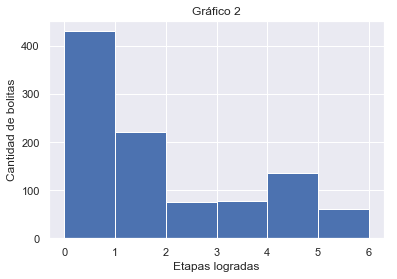

In [6]:
resultados = {0:0,1:0,2:0,3:0,4:0,5:0}
resultados_histograma = []
for i in range(1000):
    X = np.random.choice([0,1,2,3,4,5], p=[0.4,0.24,0.072,0.095,0.135,0.058])
    resultados[X]+=1
    resultados_histograma.append(X)
print("La cantidad de bolitas que pasa 0 etapas es",resultados[0])
print("La cantidad de bolitas que pasa 1 etapa es",resultados[1])
print("La cantidad de bolitas que pasa 2 etapas es",resultados[2])
print("La cantidad de bolitas que pasa 3 etapas es",resultados[3])
print("La cantidad de bolitas que pasa 4 etapas es",resultados[4])
print("La cantidad de bolitas que pasa 5 etapas es",resultados[5])

plt.hist(resultados_histograma, bins=6, range=(0,6))
plt.xlabel('Etapas logradas')
plt.ylabel('Cantidad de bolitas')
plt.title('Gráfico 2')

### Respuesta pregunta 2.d
Al comparar los resultados obtenidos con los de b, se puede notar una gran similitud en la cantidad de bolitas que pasan las etapas 0, 1, 2, 3 y 4 con la cantidad de bolitas que fallan 1, 2, 3, 4 y 5 etapas respectivamente. Esta gran similitud se puede justificar al observar las probabilidades teóricas en ambos casos, en donde la función de probabilidad evaluada en los puntos 0,1,2,3 y 4 tiene exactamente las mismas probabilidades que las obtenidas en b, es decir, la probabilidad de pasar 0 etapas es igual a la probabilidad de fallar la primera etapa, la probabilidad de pasar 1 etapa es igual a la probabilidad de fallar la segunda etapa, la probabilidad de pasar 2 etapas es igual a la probabilidad de fallar la tercera etapa, la probabilidad de pasar 3 etapas es igual a la probabilidad de fallar la cuarta etapa, y la probabilidad de pasar 4 etapas es igual a la probabilidad de fallar la quinta etapa. Por lo tanto, si se tienen probabilidades teóricas iguales, resulta lógico que en ambos casos se obtengan valores similares en la práctica. La razón por la cual no se obtuvieron valores exactamente iguales es debido a que este experimento simula aleatoriedad, y al ser aleatorio, no es posible controlar completamente lo que ocurre, y la probabilidades son una aproximación de la realidad.

Por otro lado, es posible notar que la única gran diferencia entre la función de probabilidad obtenida en c, y las probabilidades de fallar en b, es que en la pregunta b, no se considera el caso en que se logran todas las etapas, es decir, si se suman todas sus probabilidades, será distinto de 1.

En cuanto al gráfico 2 obtenido, se puede observar que la moda corresponde a pasar 0 etapas, lo que significa, que la mayoría de las bolitas no logra pasar de la primera etapa. Por otra parte, si se calcula la frecuencia acumulada de bolitas que lograron llegar hasta la etapa 5, se observa que esta es de 940 bolitas, por lo tanto, el 94% de las bolitas no logró pasar de la etapa 5, existiendo una cantidad muy pequeña que si lograron completarla y finalizar la máquina con éxito. Esto que tambien es apreciable en la pequeña barra de la etapa 5 del gráfico 2, lo que permite concluir que este es un experimeto con una probabilidad muy baja de éxito.

## 3. Perritos Enfermos

Usted trabaja en un refugio de animales que se especializa en recibir perros, además de contar con el equipo necesario para tratar con enfermedades que estos puedan presentar. Viendo las noticias se enteró que un virus sumamente peligroso para los perros se está expandiendo rápidamente por la zona y sospecha que algunos de los perros bajo su cuidado pueden estar infectados pero, no presentan un síntoma de momento. Para suerte suya este virus tiene cura hace tiempo y cuenta con el equipo para analizar muestras de saliva para detectar qué perro está infectado con el virus o no.

Usted tiene 500 perros, para no hacer la prueba 1 a 1 ha decidido juntar muestras de saliva en grupos de $K$ perros (con $K$ siendo un divisor de 500), y en caso de que el examen arroje positivo hará la prueba 1 a 1 del grupo. Asuma que 8 perros están infectados, pero usted no sabe esto a priori.

>a) ¿Es posible determinar **teóricamente** un $K$ tal que la cantidad de veces que se realiza la prueba sea la menor posible? De ser así, encuentre dicho K. ¿Qué distribución es comparable a este fenómeno?

In [14]:
from scipy.stats import hypergeom
import numpy as np

In [62]:
#Lista con todos los divisores de 500
divisores500 = [1,2,4,5,10,20,25,50,100,125,250,500]
#Diccionario que que tendra como llave un divisor de 500 y como valor, un arreglo con las probabilidades obtenidas tras realizar la distribucion hipergeometrica
res = {}
#Para cada divisor de 500, es decir, para cada valor de K, se obtienen las probabilidades de obtener de 0-8 perros infectados dados que se tiene un grupo de K perros
for i in divisores500:
    [M, n, N] = [500, 8, i]
    rv = hypergeom(M, n, N)
    x = np.arange(0, n+1)
    prob = rv.pmf(x)
    res[i] = prob
for i in res:
    j = 0
    print('Si k es',i,':')
    while j < 9:
        print('La probabilidad de encontrar',j,'perro/s infectados en un grupo de',i,'perro/s es',res[i][j])
        j+=1
    print()

Si k es 1 :
La probabilidad de encontrar 0 perro/s infectados en un grupo de 1 perro/s es 0.9840000000002177
La probabilidad de encontrar 1 perro/s infectados en un grupo de 1 perro/s es 0.016000000000001374
La probabilidad de encontrar 2 perro/s infectados en un grupo de 1 perro/s es 0.0
La probabilidad de encontrar 3 perro/s infectados en un grupo de 1 perro/s es 0.0
La probabilidad de encontrar 4 perro/s infectados en un grupo de 1 perro/s es 0.0
La probabilidad de encontrar 5 perro/s infectados en un grupo de 1 perro/s es 0.0
La probabilidad de encontrar 6 perro/s infectados en un grupo de 1 perro/s es 0.0
La probabilidad de encontrar 7 perro/s infectados en un grupo de 1 perro/s es 0.0
La probabilidad de encontrar 8 perro/s infectados en un grupo de 1 perro/s es 0.0

Si k es 2 :
La probabilidad de encontrar 0 perro/s infectados en un grupo de 2 perro/s es 0.9682244488979768
La probabilidad de encontrar 1 perro/s infectados en un grupo de 2 perro/s es 0.031551102204417064
La probab

In [40]:
#Se define un diccionario con el valor esperado de perros infectados que tendraá un grupo de K perros
valores_esperados = {1:0,2:0,4:0,5:0,10:0,20:0,25:0,50:0,100:0,125:0,250:0,500:0}
k = -1
cantidad_minima = 509
for i in res:
    j = 0
    while j < 9:
        valores_esperados[i] += res[i][j]*j
        j+=1

#Para cada valor de K se calcula la cantidad de pruebas que se deben realizar utilizando el valor esperado de perros infectados, en la parte de respuesta se explicaraá mejor este procedimiento
for i in valores_esperados:
    #Se redondea la cantidad de perros infectados a un entero, pues no pueden existir valores decimales si se trata de cantidad de perros
    esperado = round(valores_esperados[i],0)
    #Si el valor redondeado es 0, se arpoxima a 1, pues como máximo se revisan K*8 grupos
    if esperado == 0.0:
        c_pruebas = 8*i + 500/i
        print('Si K es',i,'el valor teórico de la cantidad de pruebas es',c_pruebas)
        if c_pruebas < cantidad_minima:
            k = i
            cantidad_minima = c_pruebas
    else:
        c_pruebas = (8/esperado)*i + 500/i
        print('Si K es',i,'el valor teórico de la cantidad de pruebas es',c_pruebas)
        if c_pruebas < cantidad_minima:
            k = i
            cantidad_minima = c_pruebas
print()
print('El K que minimiza la cantidad pruebas realizadas es', k,'con', int(cantidad_minima),'pruebas realizadas')

Si K es 1 el valor teórico de la cantidad de pruebas es 508.0
Si K es 2 el valor teórico de la cantidad de pruebas es 266.0
Si K es 4 el valor teórico de la cantidad de pruebas es 157.0
Si K es 5 el valor teórico de la cantidad de pruebas es 140.0
Si K es 10 el valor teórico de la cantidad de pruebas es 130.0
Si K es 20 el valor teórico de la cantidad de pruebas es 185.0
Si K es 25 el valor teórico de la cantidad de pruebas es 220.0
Si K es 50 el valor teórico de la cantidad de pruebas es 410.0
Si K es 100 el valor teórico de la cantidad de pruebas es 405.0
Si K es 125 el valor teórico de la cantidad de pruebas es 504.0
Si K es 250 el valor teórico de la cantidad de pruebas es 502.0
Si K es 500 el valor teórico de la cantidad de pruebas es 501.0

El K que minimiza la cantidad pruebas realizadas es 10 con 130 pruebas realizadas


### Respuesta Pregunta 3.a
El K obtenido de manera teórica que minimiza la cantidad de pruebas que deben realizarse es 10, con aproximadamente 130 pruebas.

Para obtener este valor se utilizó la **distribución hipergeométrica** siguiendo la siguiente fórmula:

\begin{equation*}P(X=x)   = \frac{{E \choose x}{N - E \choose K-x}}{{N \choose K}} \end{equation*}

Donde:
+ N = Cantidad total de perros
+ K = Grupo de K perros
+ E = Cantidad de perros enfermos
+ x = Número de éxitos deseados

Por lo tanto, para cada valor de x, se obtuvieron las probabilidades con los distintos K. 

Continuando, se obtuvo el valor esperado de perros infectados por grupo para cada K. Sabiendo aproximadamente cuantos perros infectados habrán por cada grupo, se pudo calcular la cantidad de grupos que debían revisarse dividiendo simplemente la cantidad total de perros infectados por la cantidad de perros infectados por grupo. Sabiendo el K y la cantidad de grupos que se revisarán para ese K, se obtuvo finalmente la cantidad total de pruebas para los distintos multiplicando el K con la cantidad de grupos a revisar y sumando además la cantidad de pruebas iniciales. De esta forma se logró encontrar un K de manera teórica que minimiza la cantidad de pruebas.

>b) Encuentre **empíricamente** un valor de $K$ que minimice la cantidad de veces que se realiza la prueba y compare con el obtenido en b)

### Código Pregunta 3.b

In [43]:
import random

i = 0
#Lista que representa el grupo de 500 perros y guarda booleanos (True si el perro se encuentra infectado y False en caso contrario)
perros = [False]*500
#Lista que guarda la posicion de los perros infectados en la lista perros
infectados = []
#Lista que contiene los divisores de 500
divisores500 = [1,2,4,5,10,20,25,50,100,125,250,500]
#Variable que guardara la menor cantidad de veces que se realizo la prueba
cantidad_minima = 501
#Variable K del enunciado que minimiza la cantidad de veces que se debe realizar la prueba
k = -1
#Variable que almacena la cantidad de perros infectados
perros_infectados = 8
#Diccionario que guardara la cantidad de pruebas para cada divisor de 500
pruebas = {}
while i != perros_infectados:
    infectado = random.randint(0,499)
    if infectado not in infectados:
        infectados.append(infectado)
        i += 1
i = 0

for j in infectados:
    perros[j] = True

#Funcion que retorna una lista con 500/k tuplas de k elementos, representando los grupos de k perros.
def grupos_perros(k,perros):
    grupos = []
    cont = 0
    largo = len(perros) 
    while cont <= largo-1:
        grupos.append(tuple(perros[cont:(cont+k)]))
        cont += k
    return grupos

#Recibe la lista de perros y retorna cuantos grupos tienen al menos un infectado
def cantidad_grupos_infectados(p):
    cantidad = 0
    for i in p:
        if True in i:
            cantidad += 1
    return cantidad

#Se busca el K que minimice la cantidad de pruebas realizadas
for i in divisores500:
    grupo = grupos_perros(i,perros)
    cantidad_grupos = cantidad_grupos_infectados(grupo)
    #Variable que guarda la cantidad de pruebas que se realizan. Su valor inicial es la cantidad de grupos pues primero se deben realizar las pruebas generales de los grupos para saber si luego se realiza las prueba a cada perro del grupo por separado
    cantidad_pruebas = len(perros)/i
    #Guarda la cantidad de grupos que fueron revisados
    grupos_revisados = 0
    for j in grupo:
        if True in j:
            grupos_revisados += 1
            cantidad_pruebas += i
        #Si ya se revisaron todos los grupos que tenian al menos un infectado, se finalizan las pruebas
        if grupos_revisados == cantidad_grupos:
            break
    if cantidad_pruebas < cantidad_minima:
        cantidad_minima = cantidad_pruebas
        k = i
    pruebas[i] = cantidad_pruebas


for i in pruebas:
    print('Si K es',i,'la cantidad de pruebas realizadas es',pruebas[i])
print()    
print('El K que minimiza la cantidad pruebas realizadas es', k,'con', int(cantidad_minima),'pruebas realizadas')


Si K es 1 la cantidad de pruebas realizadas es 508.0
Si K es 2 la cantidad de pruebas realizadas es 266.0
Si K es 4 la cantidad de pruebas realizadas es 157.0
Si K es 5 la cantidad de pruebas realizadas es 140.0
Si K es 10 la cantidad de pruebas realizadas es 130.0
Si K es 20 la cantidad de pruebas realizadas es 185.0
Si K es 25 la cantidad de pruebas realizadas es 195.0
Si K es 50 la cantidad de pruebas realizadas es 360.0
Si K es 100 la cantidad de pruebas realizadas es 405.0
Si K es 125 la cantidad de pruebas realizadas es 504.0
Si K es 250 la cantidad de pruebas realizadas es 502.0
Si K es 500 la cantidad de pruebas realizadas es 501.0

El K que minimiza la cantidad pruebas realizadas es 10 con 130 pruebas realizadas


### Respuesta Pregunta 3.b
El K que minimiza la cantidad pruebas realizadas encontrado de manera empírica es 10 con 130 pruebas realizadas.

Si se compara este valor con el obtenido en la pregunta a, se observa que se obtuvo tanto el mismo valor para K (10 perros por grupo) como para la cantidad de pruebas a realizar (130 pruebas). Por otro lado, para el resto de los valores de K, también se obtuvieron valores similares de cantidad de pruebas a realizar, lo que permite concluir que efectivamente el K que minimiza la cantidad de pruebas es 10.


>c) Ahora usted conoce la cantidad de perros infectados, realice el mismo experimento que en b) y compare sus resultados. ¿A qué se debe esta diferencia? 

### Código Pregunta 3.c

In [2]:
import random

i = 0
#Lista que representa el grupo de 500 perros y guarda booleanos (True si el perro se encuentra infectado y False en caso contrario)
perros = [False]*500
#Lista que guarda la posicion de los perros infectados en la lista perros
infectados = []
#Lista que contiene los divisores de 500.
divisores500 = [1,2,4,5,10,20,25,50,100,125,250,500]
#Variable que guardara la menor cantidad de veces que se realizo la prueba
cantidad_minima = 501
#Variable K del enunciado que minimiza la cantidad de veces que se debe realizar la prueba
k = -1
#Variable que almacena la cantidad de perros infectados
perros_infectados = 8
#Diccionario que guardara la cantidad de pruebas para cada divisor de 500
pruebas = {}


while i != perros_infectados:
    infectado = random.randint(0,499)
    if infectado not in infectados:
        infectados.append(infectado)
        i += 1
i = 0

for j in infectados:
    perros[j] = True


#Funcion que retorna una lista con 500/k tuplas de k elementos, representando los grupos de k perros.
def grupos_perros(k,perros):
    grupos = []
    cont = 0
    largo = len(perros) 
    while cont <= largo-1:
        grupos.append(tuple(perros[cont:(cont+k)]))
        cont += k
    return grupos

#Se busca el K que minimice la cantidad de pruebas realizadas
for i in divisores500:
    grupo = grupos_perros(i,perros)
    #Variable que guarda la cantidad de pruebas que se realizan. Su valor inicial es la cantidad de grupos pues primero se deben realizar las pruebas generales de los grupos para saber si luego se realiza las prueba a cada perro del grupo por separado
    cantidad_pruebas = len(perros)/i
    #Variable que guarda la cantidad de infectados encontrados, para que una vez encontrados todos los perros infectados se detengan las pruabas
    infectados_encontrados = 0
    for j in grupo:
        #Si se encontro la cantidad de perros infectados (conocida), no se realizan mas pruebas
        if infectados_encontrados == perros_infectados:
            break
        #Si el grupo tiene un infectado, se realiza la prueba 1 a 1 de ese grupo
        elif True in j:
            for z in j:
                cantidad_pruebas += 1
                #Si el perro revisado se encuentra infectado, aumenta en 1 la cantidad de infectados encontrados
                if z == True:
                    infectados_encontrados += 1
                    #Si se encontro la cantidad de perros infectados (conocida), no se realizan mas pruebas
                    if infectados_encontrados == perros_infectados:
                        break
    #Se busca el K que minimiza la cantidad de pruebas
    if cantidad_pruebas < cantidad_minima:
        cantidad_minima = cantidad_pruebas
        k = i
    pruebas[i] = cantidad_pruebas

for i in pruebas:
    print('Si K es',i,'la cantidad de pruebas realizadas es',pruebas[i])
print()  
    
print('El K que minimiza la cantidad pruebas realizadas sabiendo el el número de perros infectados es', k,'con', int(cantidad_minima),'pruebas realizadas')

Si K es 1 la cantidad de pruebas realizadas es 508.0
Si K es 2 la cantidad de pruebas realizadas es 266.0
Si K es 4 la cantidad de pruebas realizadas es 157.0
Si K es 5 la cantidad de pruebas realizadas es 139.0
Si K es 10 la cantidad de pruebas realizadas es 124.0
Si K es 20 la cantidad de pruebas realizadas es 169.0
Si K es 25 la cantidad de pruebas realizadas es 194.0
Si K es 50 la cantidad de pruebas realizadas es 234.0
Si K es 100 la cantidad de pruebas realizadas es 329.0
Si K es 125 la cantidad de pruebas realizadas es 328.0
Si K es 250 la cantidad de pruebas realizadas es 326.0
Si K es 500 la cantidad de pruebas realizadas es 325.0

El K que minimiza la cantidad pruebas realizadas sabiendo el el número de perros infectados es 10 con 124 pruebas realizadas


### Respuesta Pregunta 3.c
Si se comparan los resultados obtenidos con los de la pregunta b, es posible notar que el K que minimiza la cantidad de pruebas que se deben realizar en ambos casos es 10, pero, si se conoce la cantidad de perros infectados, se deben realizar un número menor de pruebas (124 pruebas conociendo la cantidad de perros infectados y 130 sin conocerla). La razón por la que ocurre esto es debido a que si se conoce la cantidad de perros infectados, una vez encontrados todos, no es necesario seguir realizando pruebas. En el caso contrario, el investigador solo puede conocer cuantos son los grupos con perros infectados, lo que lo obliga a revisar siempre hasta el final cada grupo hasta terminar con todos los grupos cuya prueba dio positiva, es decir, si se tienen N grupos que se sabe que contiene al menos un infectado y K perros en cada grupo, el investigador deberá realizar K*N pruebas.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día 27 de Abril a las 15hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)